In [1]:
#Paquetes necesarios: numpy, matplotlib y astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord

In [2]:
#Abrimos las imágenes de ciencia de NGC 6514 en flitro V, de 100 segundos de exposición
raw1=fits.open('Reducir2/Light_NGC_6514_V_100.000secs_00001312.fit')
raw2=fits.open('Reducir2/Light_NGC_6514_V_100.000secs_00001315.fit')
raw3=fits.open('Reducir2/Light_NGC_6514_V_100.000secs_00001316.fit')

In [3]:
#Veamos que contiene
raw1.info()

Filename: Reducir2/Light_NGC_6514_V_100.000secs_00001312.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (4096, 4096)   int16 (rescales to uint16)   


In [4]:
#Veamos el header
raw1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'na      '           / SBIGFITSEXT The name of the observer           
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [5]:
#Extraigamos las imágenes
data1=raw1[0].data
data2=raw2[0].data
data3=raw3[0].data

In [6]:
#Veamos la imagen en forma de matriz
data1

array([[ 94, 103,  93, ...,  90,  91,  89],
       [102,  95, 101, ...,  95, 101,  90],
       [110,  96, 107, ...,  85, 113,  91],
       ...,
       [ 93, 108, 101, ...,  86, 109,  85],
       [ 90,  87,  98, ...,  85,  89,  94],
       [ 97,  95, 112, ...,  81,  94,  85]], dtype=uint16)

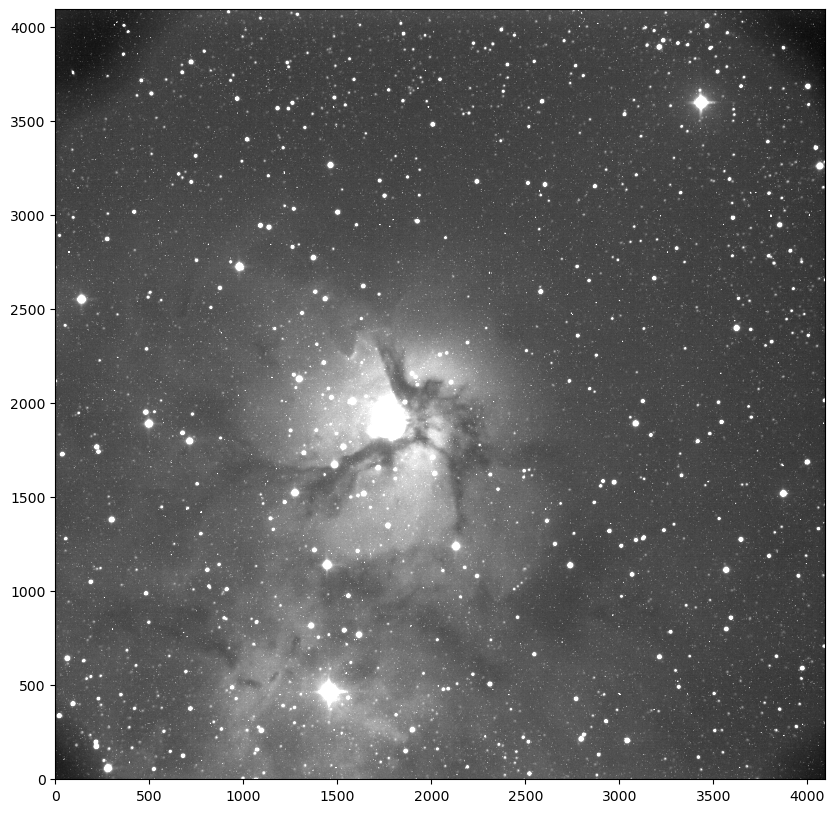

In [7]:
#Grafiquemos una imagen
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(data1)

fig=plt.figure(figsize=(10,10))
plt.imshow(data1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [8]:
#Extraemos las imágenes bias
bias1=fits.open('Reducir2/Bias_1x1_00001598.fit')[0].data
bias2=fits.open('Reducir2/Bias_1x1_00001599.fit')[0].data
bias3=fits.open('Reducir2/Bias_1x1_00001600.fit')[0].data

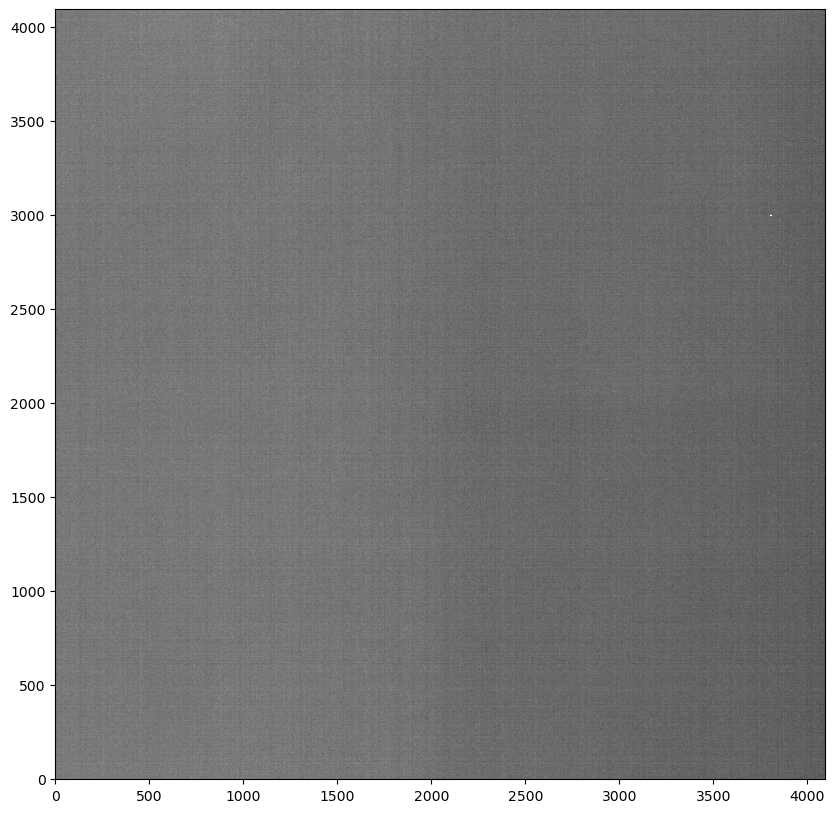

In [9]:
#Grafiquemos un bias
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(bias1)

fig=plt.figure(figsize=(10,10))
plt.imshow(bias1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [10]:
#Abrimos los darks, son de 100 segundos de exposición igual que las imágenes de ciencia
dark1=fits.open('Reducir2/DARK_100sec_B11-001.fit')[0].data
dark2=fits.open('Reducir2/DARK_100sec_B11-002.fit')[0].data
dark3=fits.open('Reducir2/DARK_100sec_B11-003.fit')[0].data

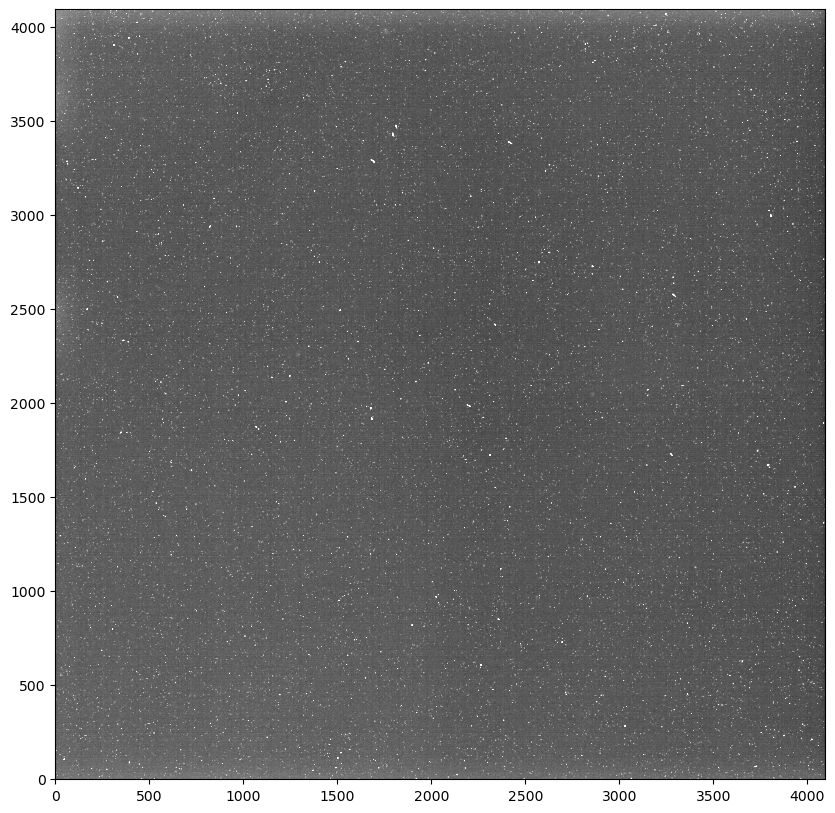

In [11]:
#Grafiquemos un dark
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(dark1)

fig=plt.figure(figsize=(10,10))
plt.imshow(dark1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [12]:
#Abrimos los flats, estos son de 10 segundos de exposición
flat1=fits.open('Reducir2/FLAT_V_B11-001.fit')[0].data
flat2=fits.open('Reducir2/FLAT_V_B11-002.fit')[0].data
flat3=fits.open('Reducir2/FLAT_V_B11-003.fit')[0].data

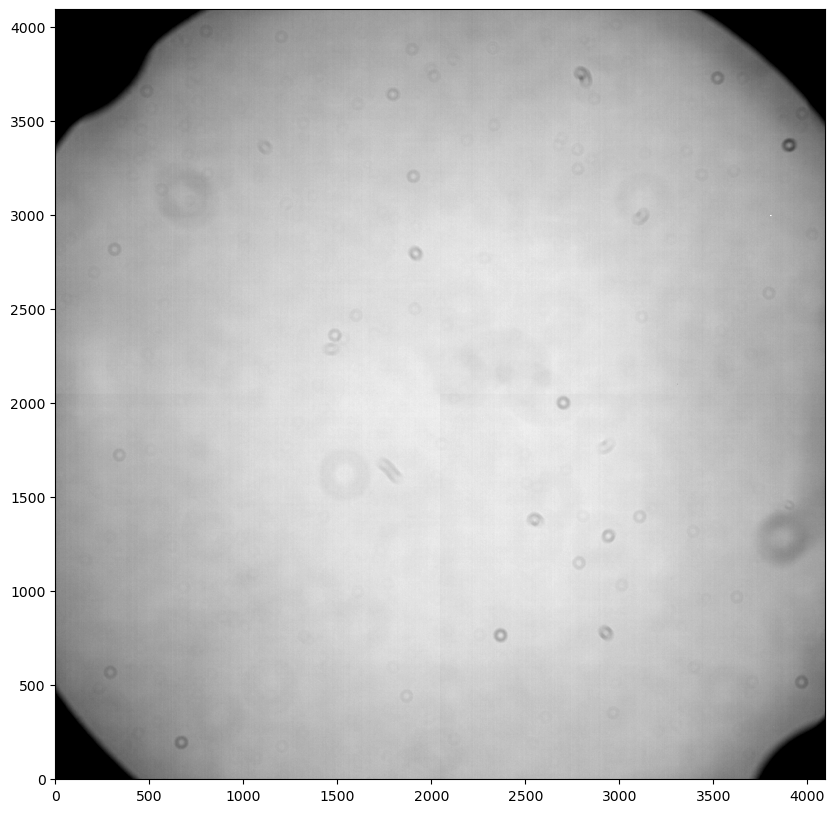

In [13]:
#Grafiquemos un flat
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(flat1)

plt.imshow(flat1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [14]:
#Combinemos los bias para generar un master bias
master_bias=np.mean([bias1,bias2,bias3],axis=0)
master_bias.shape

(4096, 4096)

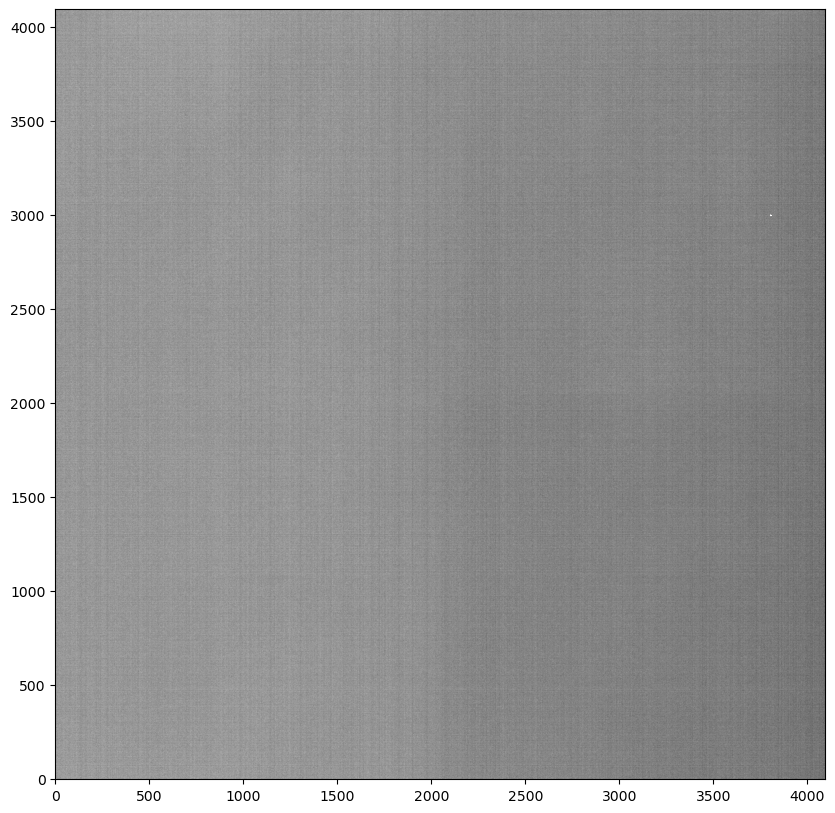

In [15]:
#Grafiquemoslo
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_bias)

plt.imshow(master_bias,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [16]:
#Generamos un master dark y un dark current
master_dark=np.median([dark1,dark2,dark3],axis=0) #Combinación simple de darks, incluye bias

dark_current=np.mean([dark1-master_bias,dark2-master_bias,dark3-master_bias],axis=0)/100 #Dark por segundo, no incluye bias

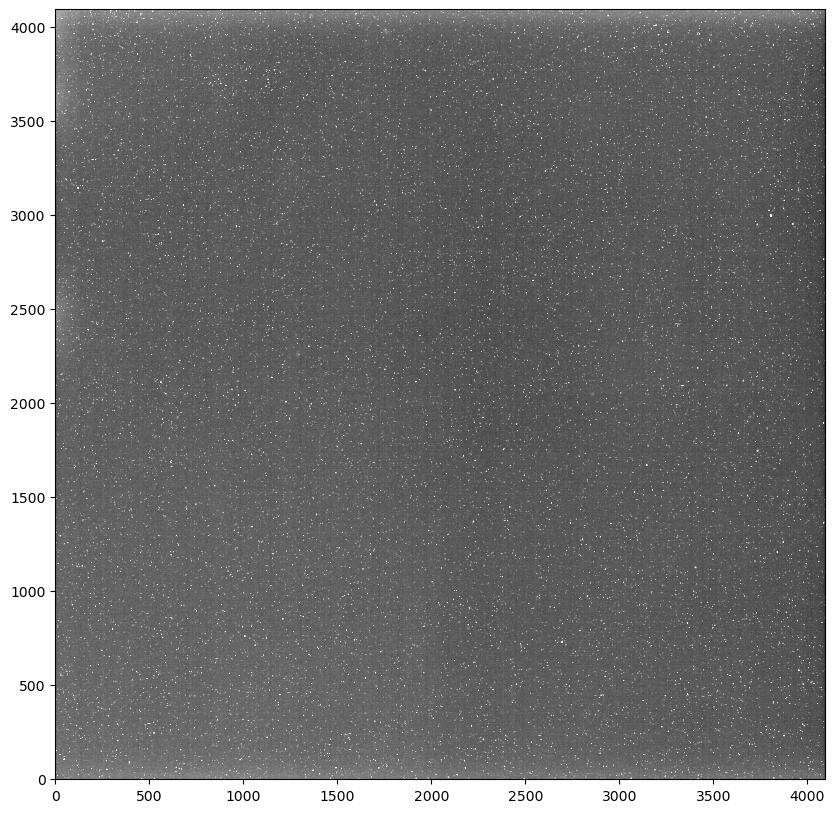

In [17]:
#Grafiquemoslos
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_dark)

plt.imshow(master_dark,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [18]:
#Generemos un master flat y normalizemoslo
#Nuestros flats son de 10 segundos de exposición, pero nuestro master dark es de 100, entonces vamos a 
#preferir escalar el dark current a 10 segundo para obtener un master dark de 10 segundos aproximado
master_flat=np.median([flat1-master_bias-dark_current*10,flat2-master_bias-dark_current*10,\
    flat3-master_bias-dark_current*10],axis=0)
master_flat_norm=master_flat/np.mean(master_flat)

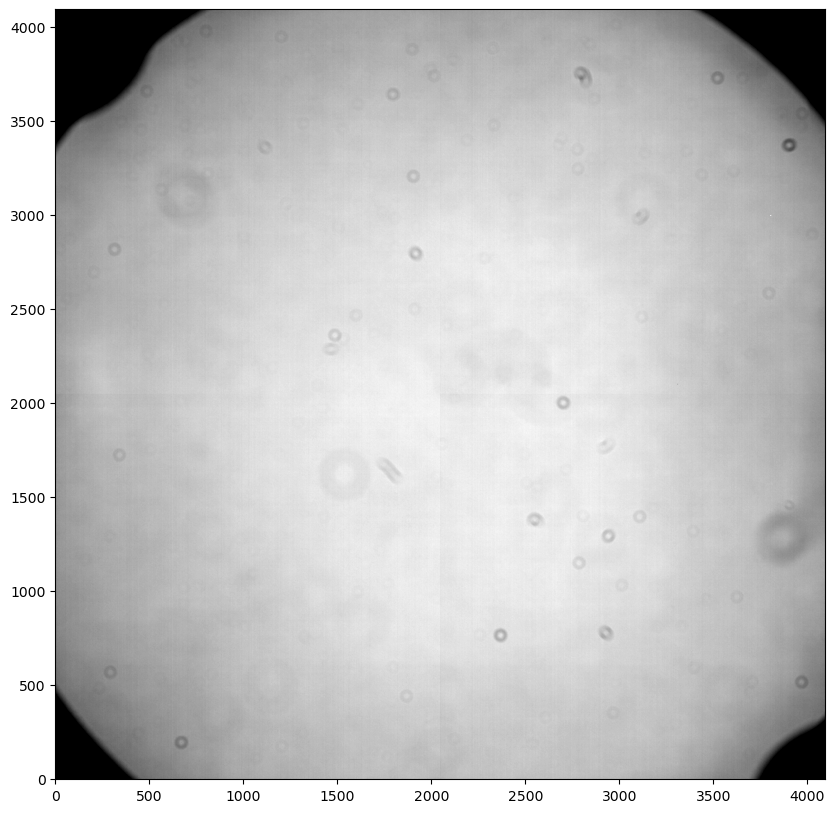

In [19]:
#Grafiquemos
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(master_flat_norm)

plt.imshow(master_flat_norm,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [20]:
#Hagámos la reducción
#Ya que nuestro master dark es de 100 segundos igual que la imagen de ciencia, podemos restar directamente
#master dark y limpiar tanto el dark como el bias de las imágenes
red1=(data1-master_dark)/master_flat_norm
red2=(data2-master_dark)/master_flat_norm
red3=(data3-master_dark)/master_flat_norm

/tmp/ipykernel_78211/1114744072.py:4: RuntimeWarning: invalid value encountered in divide
  red1=(data1-master_dark)/master_flat_norm
/tmp/ipykernel_78211/1114744072.py:5: RuntimeWarning: invalid value encountered in divide
  red2=(data2-master_dark)/master_flat_norm
/tmp/ipykernel_78211/1114744072.py:6: RuntimeWarning: invalid value encountered in divide
  red3=(data3-master_dark)/master_flat_norm


In [21]:
#Combinemos nuestras imágenes reducidas, quitamos los bordes multiplicando por una máscara
bpm=fits.open('BPM.fit')[0].data
imagen_final=np.mean([red1,red2,red3],axis=0)*bpm

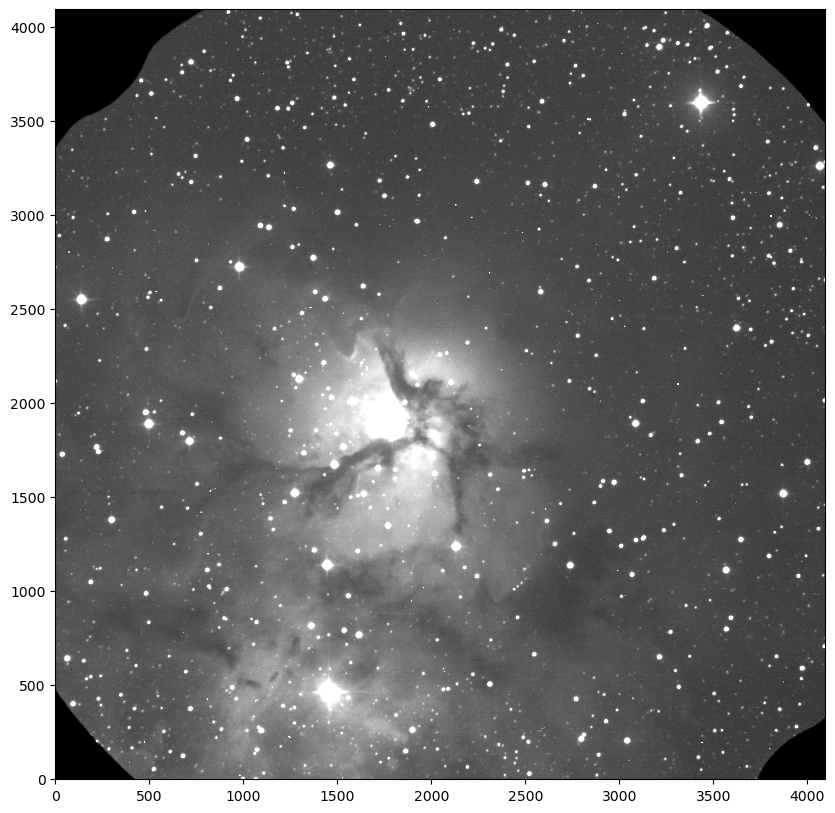

In [22]:
fig=plt.figure(figsize=(10,10))
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(imagen_final)

plt.imshow(imagen_final,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [23]:
#Creacion de fits y astrometría, en este ejemplo no 
phdu=fits.PrimaryHDU(header=raw1[0].header,data=imagen_final)
phdu.data=np.int32(phdu.data)

phdu.header['PIXSCALE'] = 0.36
phdu.header['CTYPE1'] = 'RA---TAN'
phdu.header['CTYPE2'] = 'DEC--TAN'
phdu.header['CRPIX1'] = int(phdu.header['NAXIS1']/2)
phdu.header['CRPIX2'] = int(phdu.header['NAXIS2']/2)
coord=SkyCoord(f'{phdu.header['OBJCTRA']} {phdu.header['OBJCTDEC']}', unit=(u.hourangle, u.deg)) #Transformacion de unidades a grados decimales
phdu.header['CRVAL1'] = coord.ra.value
phdu.header['CRVAL2'] = coord.dec.value
phdu.header['CD1_1'] = -0.0001
phdu.header['CD1_2'] = 0
phdu.header['CD2_1'] = 0
phdu.header['CD2_2'] = 0.0001

phdu.writeto('test.fits',overwrite=True)

/tmp/ipykernel_78211/3122799785.py:3: RuntimeWarning: invalid value encountered in cast
  phdu.data=np.int32(phdu.data)
